In [31]:
from sklearn.datasets import fetch_openml
import sklearn
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics
import numpy as np
import time
import matplotlib as plt

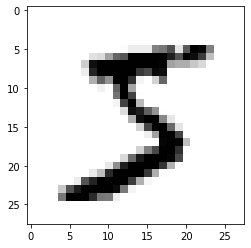

Classe :  5


In [4]:
mnist = fetch_openml('mnist_784',as_frame=False)
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print("Classe : ", mnist.target[0])

In [5]:
# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

#Entraîne le classifier
clf = neural_network.MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(50))
clf.fit(xtrain, ytrain)

#Prédiction sur le jeu de tests
pred = clf.predict(xtest)
#print("Prédiction : ", pred)
# Probabilités des prédictions sur xtest
pred_proba = clf.predict_proba(xtest)
#print("Probabilités : ", pred_proba)
# On calcule le score obtenu sur xtest avec les étiquettes ytest
score = clf.score(xtest, ytest)
print("Score échantillon de test : ", score)

#Infos image 4
print("Classe image 4 : ", ytest[3])
print("Classe prédite image 4 : ", pred[3])

#Calcul de la précision avec metrics.precision_score
print("Précision pour chaque classe : ", metrics.precision_score(ytest, pred,average=None))

Score échantillon de test :  0.9471428571428572
Classe image 4 :  4
Classe prédite image 4 :  4
Précision pour chaque classe :  [0.9722488  0.97494781 0.95077973 0.94289898 0.95481336 0.93585101
 0.96747967 0.96834012 0.88457808 0.91254205]


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
print("Précision pour chaque classe :\n", metrics.confusion_matrix(ytest, pred))

Précision pour chaque classe :
 [[2032    1    2    0    1    6    6    0   34    6]
 [   0 2335   14    5    6    2    5    8   13    2]
 [  13    7 1951   23   17    4   11   25   67    6]
 [   2    4   26 1932    0   44    2   13   45   23]
 [   3    6    9    1 1944    2    8    6    6   48]
 [   7    8    5   32    3 1809   22    3   29   12]
 [  16    4   10    0   11   18 2023    0   18    0]
 [   7    4   18   15   14    6    0 2141    5   56]
 [   2   21   16   17    8   27   13    1 1824   29]
 [   8    5    1   24   32   15    1   14   21 1899]]


In [25]:
import warnings
warnings.filterwarnings("ignore")

# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

list_scores = []
 
for i in range(1, 101, 10):
    #Entraîne le classifier
    clf = neural_network.MLPClassifier(random_state=1, max_iter=20, hidden_layer_sizes=((50,) * i))
    clf.fit(xtrain, ytrain)

    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    list_scores += [clf.score(xtest, ytest)]
    
print("Liste des scores : ", list_scores)

Liste des scores :  [0.937952380952381, 0.9632857142857143, 0.9618571428571429, 0.8938571428571429, 0.5494761904761905, 0.11290476190476191, 0.11290476190476191, 0.11290476190476191, 0.11290476190476191, 0.11290476190476191]


In [18]:
list_rounded_scores = [round(i,3) for i in list_scores]
print(list_rounded_scores)

n = 1
max_score = 0
max_index = 1
for i in list_rounded_scores:
    if i > max_score:
        max_score = i
        max_index = n
        n += 1
    else:
        n += 1
print(max_score)
print(max_index)
print(list_rounded_scores[max_index-1])

[0.214, 0.114, 0.114, 0.215, 0.377, 0.634, 0.617, 0.531, 0.492, 0.765, 0.706, 0.66, 0.738, 0.838, 0.782, 0.879, 0.846, 0.897, 0.911, 0.87, 0.905, 0.919, 0.879, 0.91, 0.913, 0.922, 0.922, 0.922, 0.918, 0.916, 0.917, 0.919, 0.924, 0.928, 0.929, 0.935, 0.927, 0.923, 0.929, 0.929, 0.931, 0.936, 0.934, 0.927, 0.936, 0.929, 0.935, 0.931, 0.937, 0.93, 0.938, 0.935, 0.938, 0.937, 0.939, 0.938, 0.941, 0.939, 0.941, 0.943, 0.945, 0.941, 0.944, 0.943, 0.941, 0.941, 0.941, 0.945, 0.942, 0.947, 0.945, 0.944, 0.948, 0.939, 0.947, 0.943, 0.94, 0.946, 0.95, 0.945, 0.951, 0.949, 0.947, 0.947, 0.944, 0.95, 0.951, 0.946, 0.951, 0.949, 0.952, 0.948, 0.947, 0.949, 0.95, 0.949, 0.947, 0.946, 0.95, 0.954]
0.954
100
0.954


In [32]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

rand_nb_couches_cachees = np.random.randint(low=1, high=10, size=5)
rand_taille_couches = np.random.randint(low=10, high=300, size=5)

#Liste des tuples utilisés comme arguments pour hidden_layer_sizes
list_args = []
for i in range(5):
    list_args += [((rand_taille_couches[i],) * rand_nb_couches_cachees[i])]

list_scores = []
list_training_times = []
list_predicting_times = []

for i in range(5):
    #Entraîne le classifier
    t1 = round(time.time(),3)
    clf = neural_network.MLPClassifier(random_state=1, max_iter=20, hidden_layer_sizes=list_args[i])
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    list_scores += [clf.score(xtest, ytest)]
    list_training_times += [t2-t1]
    list_predicting_times += [t3-t2]
    
print("Liste des scores : \n", list_scores)
print("Temps d'entraînement : \n", list_training_times)
print("Temps de prédiction : \n", list_predicting_times)

Liste des scores : 
 [0.9682380952380952, 0.9711904761904762, 0.9734761904761905, 0.9657619047619047, 0.9624285714285714]
Temps d'entraînement : 
 [0.967, 0.9704761904761905, 0.9586190476190476, 0.9702380952380952, 0.9645238095238096]
Temps de prédiction : 
 [0.967, 0.9704761904761905, 0.9586190476190476, 0.9702380952380952, 0.9645238095238096]


In [34]:
print("Temps d'entraînement : \n", list_training_times)
print("Temps de prédiction : \n", list_predicting_times)
print(list_args)

Temps d'entraînement : 
 [28.21499991416931, 54.074000120162964, 75.52600002288818, 26.98900008201599, 17.579999923706055]
Temps de prédiction : 
 [0.09300017356872559, 0.20399999618530273, 0.2669999599456787, 0.08899998664855957, 0.0710000991821289]
[(297, 297), (222, 222, 222, 222, 222, 222, 222), (244, 244, 244, 244, 244, 244, 244, 244, 244), (265, 265), (150, 150, 150)]


In [36]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

rand_nb_couches_cachees = np.random.randint(low=1, high=10, size=5)
rand_taille_couches = np.random.randint(low=10, high=300, size=5)

#Liste des tuples utilisés comme arguments pour hidden_layer_sizes
list_args = []
for i in range(5):
    list_args += [((rand_taille_couches[i],) * rand_nb_couches_cachees[i])]

list_scores = []
list_training_times = []
list_predicting_times = []

solvers = ["adam","lbfgs","sgd"]

for i in solvers:
    #Entraîne le classifier
    t1 = round(time.time(),3)
    clf = neural_network.MLPClassifier(random_state=1, max_iter=75, hidden_layer_sizes=(50), verbose=True, solver=i)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    list_scores += [clf.score(xtest, ytest)]
    list_training_times += [t2-t1]
    list_predicting_times += [t3-t2]
    
print("Liste des scores : \n", list_scores)
print("Temps d'entraînement : \n", list_training_times)
print("Temps de prédiction : \n", list_predicting_times)

Iteration 1, loss = 3.54940485
Iteration 2, loss = 0.88067693
Iteration 3, loss = 0.64504156
Iteration 4, loss = 0.52889025
Iteration 5, loss = 0.44844534
Iteration 6, loss = 0.38176710
Iteration 7, loss = 0.33897928
Iteration 8, loss = 0.30837530
Iteration 9, loss = 0.27728672
Iteration 10, loss = 0.25089914
Iteration 11, loss = 0.23463636
Iteration 12, loss = 0.21708870


KeyboardInterrupt: 

In [38]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

rand_nb_couches_cachees = np.random.randint(low=1, high=10, size=5)
rand_taille_couches = np.random.randint(low=10, high=300, size=5)

#Liste des tuples utilisés comme arguments pour hidden_layer_sizes
list_args = []
for i in range(5):
    list_args += [((rand_taille_couches[i],) * rand_nb_couches_cachees[i])]

list_scores = []
list_training_times = []
list_predicting_times = []

activations = ["identity", "logistic", "tanh", "relu"]

for i in activations:
    #Entraîne le classifier
    t1 = round(time.time(),3)
    clf = neural_network.MLPClassifier(random_state=1, max_iter=75, hidden_layer_sizes=(50), verbose=True, activation=i)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    list_scores += [clf.score(xtest, ytest)]
    list_training_times += [t2-t1]
    list_predicting_times += [t3-t2]
    
print("Liste des scores : \n", list_scores)
print("Temps d'entraînement : \n", list_training_times)
print("Temps de prédiction : \n", list_predicting_times)

Iteration 1, loss = 4.88688537
Iteration 2, loss = 3.04840280
Iteration 3, loss = 2.56350828
Iteration 4, loss = 2.36443117
Iteration 5, loss = 2.14888342
Iteration 6, loss = 1.90164455
Iteration 7, loss = 1.73369800
Iteration 8, loss = 1.59113644
Iteration 9, loss = 1.39238775
Iteration 10, loss = 1.20865984
Iteration 11, loss = 1.09884529
Iteration 12, loss = 0.92044718
Iteration 13, loss = 0.70704742
Iteration 14, loss = 0.62447704
Iteration 15, loss = 0.55514874
Iteration 16, loss = 0.47053810
Iteration 17, loss = 0.42364989
Iteration 18, loss = 0.36724990
Iteration 19, loss = 0.35226683
Iteration 20, loss = 0.32861833
Iteration 21, loss = 0.31863052
Iteration 22, loss = 0.31220412
Iteration 23, loss = 0.31712321
Iteration 24, loss = 0.31474418
Iteration 25, loss = 0.31866966
Iteration 26, loss = 0.30748726
Iteration 27, loss = 0.31383517
Iteration 28, loss = 0.30871978
Iteration 29, loss = 0.31905501
Iteration 30, loss = 0.31754223
Iteration 31, loss = 0.31449971
Iteration 32, los

Iteration 69, loss = 0.05925131
Iteration 70, loss = 0.05897166
Iteration 71, loss = 0.06323861
Iteration 72, loss = 0.05303486
Iteration 73, loss = 0.05154365
Iteration 74, loss = 0.05105144
Iteration 75, loss = 0.05220767
Liste des scores : 
 [0.8988571428571429, 0.9483333333333334, 0.9317142857142857, 0.949047619047619]
Temps d'entraînement : 
 [7.937000036239624, 22.261000156402588, 21.019999980926514, 23.22000002861023]
Temps de prédiction : 
 [0.019999980926513672, 0.037999868392944336, 0.026000022888183594, 0.03099989891052246]


In [42]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

rand_nb_couches_cachees = np.random.randint(low=1, high=10, size=5)
rand_taille_couches = np.random.randint(low=10, high=300, size=5)

#Liste des tuples utilisés comme arguments pour hidden_layer_sizes
list_args = []
for i in range(5):
    list_args += [((rand_taille_couches[i],) * rand_nb_couches_cachees[i])]

list_scores = []
list_training_times = []
list_predicting_times = []

alphas = [0.0000001, 0.0001, 0.1,100]

for i in alphas:
    #Entraîne le classifier
    t1 = round(time.time(),3)
    clf = neural_network.MLPClassifier(random_state=1, max_iter=75, hidden_layer_sizes=(50), verbose=True, alpha=i)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    list_scores += [clf.score(xtest, ytest)]
    list_training_times += [t2-t1]
    list_predicting_times += [t3-t2]
    
print("Liste des scores : \n", list_scores)
print("Temps d'entraînement : \n", list_training_times)
print("Temps de prédiction : \n", list_predicting_times)

Iteration 1, loss = 3.49485971
Iteration 2, loss = 0.84186877
Iteration 3, loss = 0.59897763
Iteration 4, loss = 0.48222816
Iteration 5, loss = 0.40910038
Iteration 6, loss = 0.35698485
Iteration 7, loss = 0.31890082
Iteration 8, loss = 0.28702521
Iteration 9, loss = 0.26178729
Iteration 10, loss = 0.24501095
Iteration 11, loss = 0.22980867
Iteration 12, loss = 0.21697680
Iteration 13, loss = 0.20317091
Iteration 14, loss = 0.19518376
Iteration 15, loss = 0.19095851
Iteration 16, loss = 0.18390372
Iteration 17, loss = 0.17403983
Iteration 18, loss = 0.17021642
Iteration 19, loss = 0.16806605
Iteration 20, loss = 0.16107239
Iteration 21, loss = 0.15432827
Iteration 22, loss = 0.15130544
Iteration 23, loss = 0.15175568
Iteration 24, loss = 0.13813033
Iteration 25, loss = 0.13209256
Iteration 26, loss = 0.13215236
Iteration 27, loss = 0.13028761
Iteration 28, loss = 0.12767990
Iteration 29, loss = 0.12595089
Iteration 30, loss = 0.12546783
Iteration 31, loss = 0.11411925
Iteration 32, los

In [43]:
# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

list_scores = []
list_training_times = []
list_predicting_times = []

#Entraîne le classifier
t1 = round(time.time(),3)
clf = neural_network.MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=((85,)*15), solver = "adam", activation = "relu", verbose=True)
clf.fit(xtrain, ytrain)
t2 = round(time.time(),3)
#Prédiction sur le jeu de tests
pred = clf.predict(xtest)
t3 = round(time.time(),3)
# Probabilités des prédictions sur xtest
pred_proba = clf.predict_proba(xtest)
# On calcule le score obtenu sur xtest avec les étiquettes ytest
list_scores += [clf.score(xtest, ytest)]
list_training_times += [t2-t1]
list_predicting_times += [t3-t2]
    
print("Liste des scores : \n", list_scores)
print("Temps d'entraînement : \n", list_training_times)
print("Temps de prédiction : \n", list_predicting_times)

Iteration 1, loss = 0.57337126
Iteration 2, loss = 0.20280950
Iteration 3, loss = 0.14216666
Iteration 4, loss = 0.11681260
Iteration 5, loss = 0.10720796
Iteration 6, loss = 0.09074891
Iteration 7, loss = 0.08103471
Iteration 8, loss = 0.06976683
Iteration 9, loss = 0.06197761
Iteration 10, loss = 0.05580839
Iteration 11, loss = 0.05015979
Iteration 12, loss = 0.05246334
Iteration 13, loss = 0.04689268
Iteration 14, loss = 0.04248118
Iteration 15, loss = 0.04141969
Iteration 16, loss = 0.04317236
Iteration 17, loss = 0.03933356
Iteration 18, loss = 0.03442768
Iteration 19, loss = 0.03741615
Iteration 20, loss = 0.04165660
Iteration 21, loss = 0.03127276
Iteration 22, loss = 0.03138382
Iteration 23, loss = 0.03052995
Iteration 24, loss = 0.02485801
Iteration 25, loss = 0.03525228
Iteration 26, loss = 0.02694870
Iteration 27, loss = 0.02967749
Iteration 28, loss = 0.04004878
Iteration 29, loss = 0.03521499
Iteration 30, loss = 0.02014281
Iteration 31, loss = 0.02504718
Iteration 32, los